# 4.7.1 데이터 추가 처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('/content/drive/MyDrive/기말고사 과제/Bike Data 2.csv')
df.shape

(8751, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8751 non-null   int64  
 1   Temperature        8751 non-null   float64
 2   Humidity           8751 non-null   float64
 3   Wind speed         8751 non-null   float64
 4   Visibility         8751 non-null   int64  
 5   Solar Radiation    8751 non-null   float64
 6   Rented Bike B      8751 non-null   float64
 7   Date               8464 non-null   float64
 8   Hour               8751 non-null   float64
 9   Seasons            8751 non-null   float64
 10  Functioning Day    8751 non-null   float64
 11  Holiday            8751 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 820.5 KB


In [5]:
df.dtypes

,0
Rented Bike Count,int64
Temperature,float64
Humidity,float64
Wind speed,float64
Visibility,int64
Solar Radiation,float64
Rented Bike B,float64
Date,float64
Hour,float64
Seasons,float64


In [6]:
df.isna().any()[lambda x: x]   # 결측값을 갖고 있는 변수명(컬럼명) 찾기

,0
Date,True


In [7]:
# 데이터프레임 df에 있는 모든 컬럼(변수)의 결측값 보유 비율을 확인

df.isnull().mean().sort_values(ascending=False) # 결측값 비율을 내림차순으로 보여주기

,0
Date,0.032796
Rented Bike Count,0.000000
Temperature,0.000000
Humidity,0.000000
Wind speed,0.000000
Visibility,0.000000
Solar Radiation,0.000000
Rented Bike B,0.000000
Hour,0.000000
Seasons,0.000000


In [8]:
df.to_csv('/content/drive/MyDrive/기말고사 과제/2017DC1-all.csv', index=False)

In [9]:
df_with_VALP_B1 = df.drop(['Rented Bike Count'], axis=1)   # 타겟변수 VALP를 제외한 변수를 저장
df_with_VALP_B1.shape

(8751, 11)

In [10]:
df_with_VALP_B1.to_csv('/content/drive/MyDrive/기말고사 과제/2017DC1.csv', index=False)

# 4.7.2 데이터 분할 및 대체

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('2017DC1.csv')
df.shape

FileNotFoundError: [Errno 2] No such file or directory: '2017DC1.csv'

In [12]:
# 참조 코딩
df.dtypes

,0
Rented Bike Count,int64
Temperature,float64
Humidity,float64
Wind speed,float64
Visibility,int64
Solar Radiation,float64
Rented Bike B,float64
Date,float64
Hour,float64
Seasons,float64


In [13]:
# 참조 코딩
# 범주형 변수를 cols1에 저장.
cols = ['Date','Hour','Seasons','Functioning Day','Holiday','Rented Bike B']

# 범주형 변수의 dtype을 category로 변경
df[cols] = df[cols].astype('category')
df.dtypes

,0
Rented Bike Count,int64
Temperature,float64
Humidity,float64
Wind speed,float64
Visibility,int64
Solar Radiation,float64
Rented Bike B,category
Date,category
Hour,category
Seasons,category


In [14]:
data = df.drop(['Rented Bike B'], axis=1)   # 타겟변수를 제외한 입력변수를 data에 저장
target = df['Rented Bike B']                # 타겟변수만 target에 저장

In [15]:
data.shape

(8751, 11)

In [16]:
target.shape

(8751,)

In [17]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의

# 4.7.3 Random Forest 모델

In [23]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestRegressor(n_estimators = 100, random_state=0)
model = rf.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
#accuracy = accuracy_score(y_test, pred)

print ("Random Forest Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("Random Forest Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Random Forest Accuracy on training set:1.00000
Random Forest Accuracy on test set:1.00000


In [24]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
rf = RandomForestClassifier(n_estimators = 100, random_state=0)

In [25]:
# 그리드 서치 실행

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'max_depth': range(10, 41), 'n_estimators': [100, 200]}

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_rf = GridSearchCV(rf, param_grid=params, scoring='accuracy', cv=cross_validation,
                       verbose=1, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_rf.best_score_))
print("GridSearchCV best parameter:", (grid_rf.best_params_))

Fitting 5 folds for each of 62 candidates, totalling 310 fits
GridSearchCV max accuracy:0.99977
GridSearchCV best parameter: {'max_depth': 11, 'n_estimators': 200}


In [26]:
best_clf = grid_rf.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:1.00000
ROC AUC on test set:1.00000


In [27]:
# 참조 코딩
print ("Feature importances:")
print (best_clf.feature_importances_)

Feature importances:
[6.67199804e-01 8.50720334e-02 3.32188239e-02 5.32839895e-03
 9.58208691e-03 2.65569989e-02 0.00000000e+00 7.16229268e-02
 8.73685072e-02 1.37138837e-02 3.36536431e-04]


In [28]:
# 변수명을 Index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 3), index=feature_names,
                   columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False)
dft1                                 # 컬럼 Feature_importances의 값들을 내림차순으로 정리

,Feature_importances
Rented Bike Count,0.667
Seasons,0.087
Temperature,0.085
Hour,0.072
Humidity,0.033
Solar Radiation,0.027
Functioning Day,0.014
Visibility,0.010
Wind speed,0.005
Date,0.000


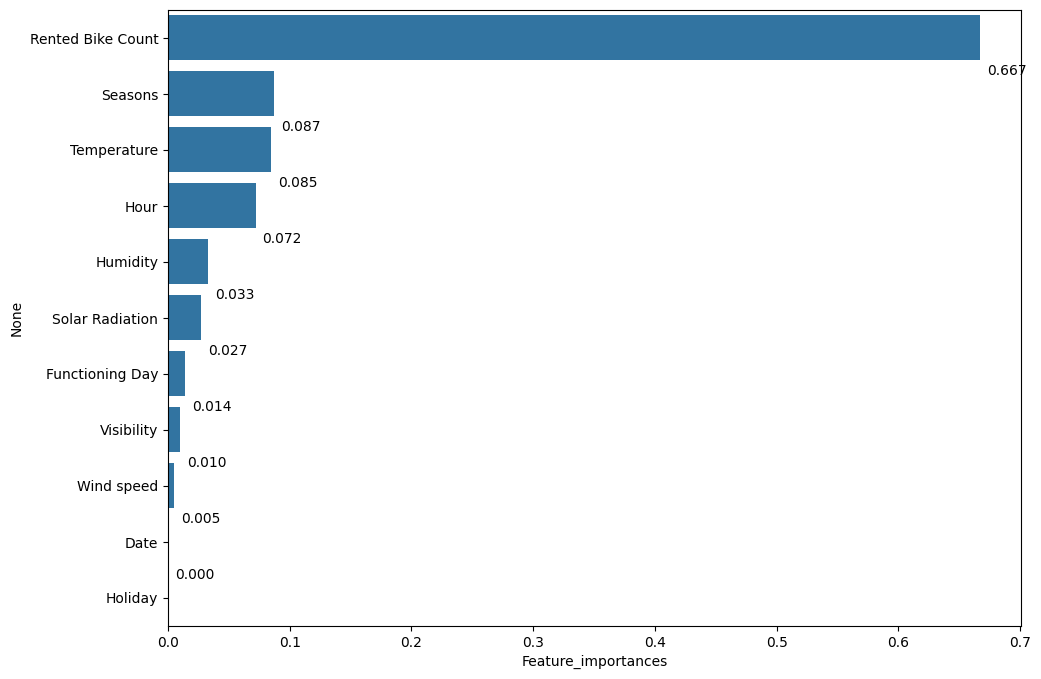

In [29]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(11, 8))
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.3),
                xytext=(5, 10), textcoords='offset points')

In [30]:
# 70:30 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.3, random_state=42)   # test_size=0.5임에 주의

In [31]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 100, random_state=0)
model = rf.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("Random Forest Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("Random Forest Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Random Forest Accuracy on training set:1.00000
Random Forest Accuracy on test set:1.00000
